In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from matplotlib import cm
from sklearn.metrics import r2_score, mean_squared_error
import string 

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import plotting
from src.utils import combine_prediction_files, compute_network_avg_prediction

In [11]:
SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('figure', labelsize=MEDIUM_SIZE)

In [5]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
p_selected_feat_dir = os.path.join(datadir, 'p_models', 'selected_features_constHP')
s_selected_feat_dir = os.path.join(datadir, 's_models', 'selected_features_constHP')

In [6]:
ypml_amps = pd.read_csv(f'../data/catalogs/yellowstone.amps.ypml-v5.2024.csv')

In [7]:
stations = ypml_amps['Sta'].unique()

In [8]:
p_test_preds_df = combine_prediction_files(stations, p_selected_feat_dir,'P', 'test')
p_holdout_preds_df = combine_prediction_files(stations, p_selected_feat_dir,'P', 'holdout')


/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/BOZ.P.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/BW06.P.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/AHID.P.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/LOHW.P.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/BOZ.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/BW06.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/AHID.P.pre

In [9]:
s_test_preds_df = combine_prediction_files(stations, s_selected_feat_dir,'S', 'test')
s_holdout_preds_df = combine_prediction_files(stations, s_selected_feat_dir,'S', 'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/BOZ.S.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/BW06.S.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/AHID.S.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/LOHW.S.preds.test.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/BOZ.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/BW06.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/AHID.S.pre

Text(0.5, 0.01, 'Network $M_{L,YP21}$')

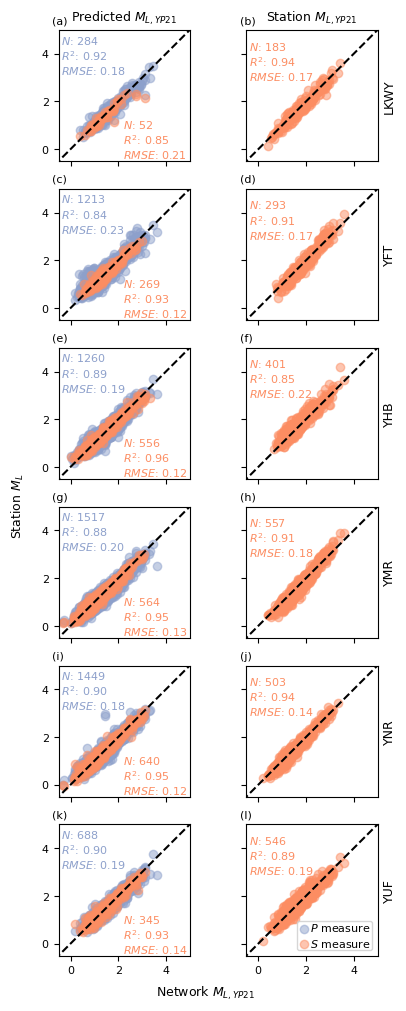

In [22]:
p_stats = np.sort(p_test_preds_df.station.unique())
fig, axes = plt.subplots(len(p_stats), 2,
                          constrained_layout=True,
                          figsize=(4, 10))
ypml_color = '#fc8d62' #'#66c2a5' #'#998ec3'
s_color ='#fc8d62' # '#66c2a5' #'#f1a340'
p_color = '#8da0cb' ##66c2a5' #'#fc8d62' #'#998ec3'

for i in range(0, p_stats.shape[0]):
    if i == 0:
        axes[i][0].set_title('Predicted $M_{L,YP21}$')
    stat = p_stats[i]
    p_stat_df = pd.concat([p_test_preds_df[p_test_preds_df['station'] == stat],
                         p_holdout_preds_df[p_holdout_preds_df['station'] == stat]])
    evids = p_stat_df.Evid.values
    s_stat_df = pd.concat([s_test_preds_df[s_test_preds_df['station'] == stat],
                         s_holdout_preds_df[s_holdout_preds_df['station'] == stat]])
    s = axes[i][0].scatter(p_stat_df['magnitude'], 
                       p_stat_df['predicted_magnitude'],
                       alpha=0.5,
                       color=p_color,
                       label='$\it{P}$ measure')
    if len(s_stat_df) > 0:
        axes[i][0].scatter(s_stat_df['magnitude'], 
                           s_stat_df['predicted_magnitude'],
                            alpha=0.5,
                            color=s_color)
        evids = np.unique(np.concatenate([evids, s_stat_df['Evid'].values]))

    p_r2 = r2_score(p_stat_df['magnitude'],
                       p_stat_df['predicted_magnitude'])    
    p_rmse = mean_squared_error(p_stat_df['magnitude'],
                        p_stat_df['predicted_magnitude'], 
                        squared=False
                        )   
    
    s_r2 = r2_score(s_stat_df['magnitude'],
                       s_stat_df['predicted_magnitude'])    
    s_rmse = mean_squared_error(s_stat_df['magnitude'],
                        s_stat_df['predicted_magnitude'], 
                        squared=False
                        )   
    axes[i][0].plot(np.arange(-1, 6), 
                    np.arange(-1, 6),
                      color='k',
                      linestyle='--')
    axes[i][0].set_aspect('equal', adjustable='box')
    axes[i][0].tick_params(axis='both', which='major', labelsize=8)
    axes[i][0].set_ylim([-0.5, 5])
    axes[i][0].set_xlim([-0.5, 5])
    axes[i][0].set_xticks([0, 2, 4])
    axes[i][0].set_yticks([0, 2, 4])

    axes[i][0].text(-0.4, 3.15,
                f"$N$:{p_stat_df.shape[0]: 0.0f}\n$R^2$:{p_r2: 0.2f}\n$RMSE$:{p_rmse: 0.2f}",
                color=p_color,)
    
    axes[i][0].text(2.2, -0.4,
                    f"$N$:{s_stat_df.shape[0]: 0.0f}\n$R^2$:{s_r2: 0.2f}\n$RMSE$:{s_rmse: 0.2f}", 
                    color=s_color,)
                #bbox=dict(facecolor='white', alpha=0.5, edgecolor='white')) 
    
handles = [s]
for i in range(0, p_stats.shape[0]):
    if i == 0:
        axes[i][1].set_title('Station $M_{L,YP21}$')
    stat = p_stats[i]
    ypml_stat_df = ypml_amps[(ypml_amps['Sta'] == stat) & (ypml_amps.Evid.isin(evids))]

    ypml_r2 = r2_score(ypml_stat_df['Event-Mean-YPML-S'],
                       ypml_stat_df['Station-YPML-S'])    
    ypml_rmse = mean_squared_error(ypml_stat_df['Event-Mean-YPML-S'],
                        ypml_stat_df['Station-YPML-S'], 
                        squared=False
                        )   
    s = axes[i][1].scatter(ypml_stat_df['Event-Mean-YPML-S'], 
                       ypml_stat_df['Station-YPML-S'],
                       alpha=0.5,
                       color=ypml_color,
                       label='$\it{S}$ measure')
    axes[i][1].set_aspect('equal', adjustable='box')
    axes[i][1].plot(np.arange(-1, 6), 
                np.arange(-1, 6),
                    color='k',
                    linestyle='--')
    axes[i][1].tick_params(axis='both', which='major', labelsize=8)
    axes[i][1].set_ylim([-0.5, 5])
    axes[i][1].set_xlim([-0.5, 5])
    axes[i][1].set_xticks([0, 2, 4])
    axes[i][1].set_yticks([0, 2, 4])

    axes[i][1].text(-0.4, 2.9,
                f"$N$:{ypml_stat_df.shape[0]: 0.0f}\n$R^2$:{ypml_r2: 0.2f}\n$RMSE$:{ypml_rmse: 0.2f}", 
                color=s_color,)
    axes[i][1].yaxis.set_label_position("right")
    axes[i][1].set_ylabel(stat)

handles.append(s)
axes[i][1].legend(handles=handles,
                  loc='lower right',
                  borderpad=0.09,
                  handletextpad=0.1,
                  handlelength=1,
                  labelspacing=0.3)

for i in range(axes.shape[0]):
    axes[i][1].set_yticklabels([])

for ax in axes.flatten()[:-2]:
    ax.set_xticklabels([])
    

subpanel_labels = list(string.ascii_lowercase)
for i, ax in enumerate(axes.flatten()):
    ax.text(-0.05, 1.05, f'({subpanel_labels[i]})', 
    transform=ax.transAxes,)

fig.supylabel("Station $M_L$")
fig.supxlabel("Network $M_{L,YP21}$")
